# Métodos não supervisionados - Comparação entre modelos

Você tem em mãos dados de perfis de clientes de cartão de crédito e para entender melhor o perfil, pediram para você analisar esses dados em busca de insights.

Para entender melhor o perfil de cada cliente, você deve fazer uma clusterização com os três métodos que aprendemos e dizer qual é o perfil médio de dos clientes de cada cluster. 

Você pode ler informações sobre esse dataset nesse link do [Kaggle](https://www.kaggle.com/aryashah2k/credit-card-customer-data).

Para fazer a análise, você precisa:
- Tratar os dados e observar as estatísticas descritivas e distribuições dos dados
- Fazer uma transformação para standarizar os dados
- Definir o número de clusters de cada método se aplicável
- Fazer a cada clustering
- Avaliar cada cluster com PCA
- Entender quais os perfis dos clusters de cada método
- Comparar para ver se os 5 métodos chegam no mesmo resultado e qual a qualidade de cada método

In [1]:
#aqui tem as bibliotecas que vamos utilizar
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores

## 1) Importação dos dados

Aqui você deve exportar os dados do kaggle para o colab.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Credit Card Customer Data.csv to Credit Card Customer Data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Credit Card Customer Data.csv']))

## 2) Tratamento, estatísticas descritivas e visualização dos dados

In [4]:
df.describe() #estatisticas descritivas 

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [5]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
df.isna().sum() #aqui estamos vendo se o quanto de valores vazios temos no dataset

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
df = df.drop(['Customer Key','Sl_No'], axis=1) # aqui vamos excluir a coluna de ID dos usuários

### 2.1) Histograma dos dados



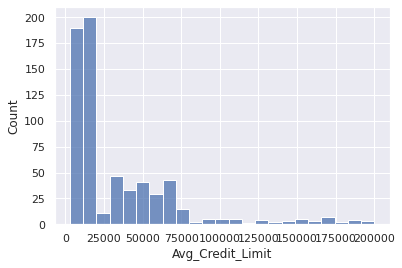

In [8]:
sns.histplot(x="Avg_Credit_Limit", data=df)

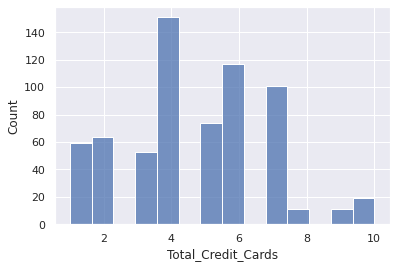

In [9]:
sns.histplot(x="Total_Credit_Cards", data=df)

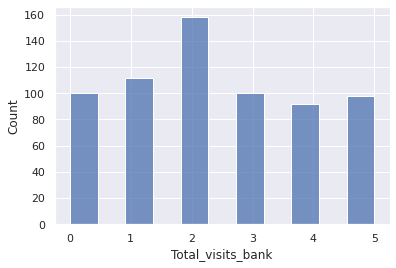

In [10]:
sns.histplot(x="Total_visits_bank", data=df)

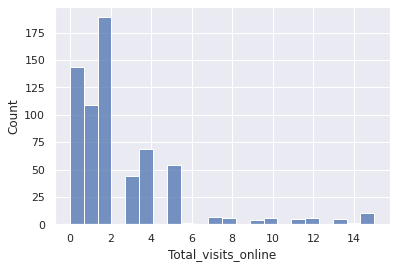

In [11]:
sns.histplot(x='Total_visits_online', data=df)

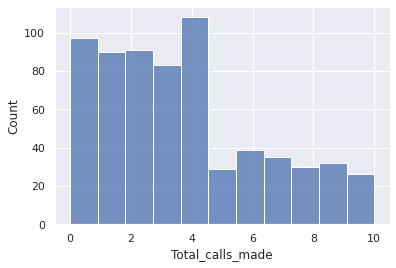

In [12]:
sns.histplot(x='Total_calls_made', data=df)

### 2.2) Tratamento de outliers

Dado os histogramas e a quantidade de dados, não será necessário tratar outliers

In [13]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


### 2.3) Standarização dos dados

In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

## 3) Hierarquia de Cluster

### 3.1) Determinação do numero de clusteres através do dendograma

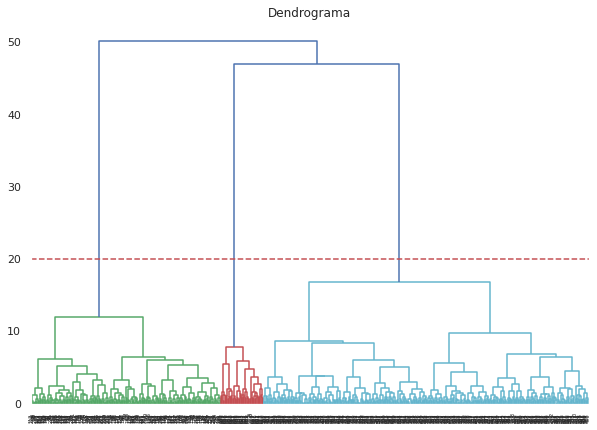

In [15]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')

Vamos escolher 3 clusters para o nosso dataset

### 3.2) Clusterização

In [16]:
cluster = AgglomerativeClustering(n_clusters=3)  
labels_hier = cluster.fit_predict(data_scaled)
df_hier=df
df_hier['labels_hier']=labels_hier.astype('str') # aqui atribuimos o numero de cada clusters

### 3.3) Observação dos clusteres

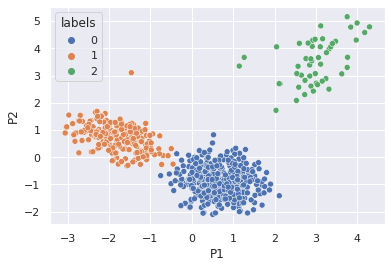

In [17]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf['labels']=df_hier['labels_hier']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

## 4) K-Means

### 4.1) Método do cotovelo para seleção do número de clusters

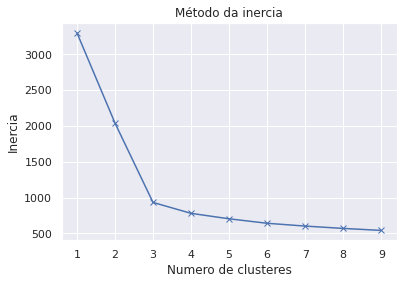

In [18]:
inertias = []
K = range(1, 10)
from scipy.spatial.distance import cdist
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data_scaled)
    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Numero de clusteres')
plt.ylabel('Inercia')
plt.title('Método da inercia')
plt.show()

Vamos escolher 3 clusteres


### 4.2) Clusterização

In [19]:
model = KMeans(3) #aqui treinamos o modelo
labels_kmeans = model.fit_predict(data_scaled) #lembre-se de treinar com os dados normalizados
df_kmeans=df
df_kmeans['labels_kmeans']=labels_kmeans.astype('str') # aqui atribuimos o numero de cada clusters

### 4.3) Observação dos clusteres

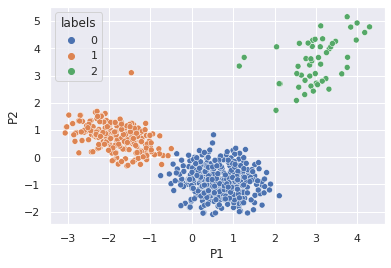

In [20]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf['labels']=df_kmeans['labels_kmeans']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

## 5) DBSCAN

### 5.1) Determinação do valor da distância entre vizinhos

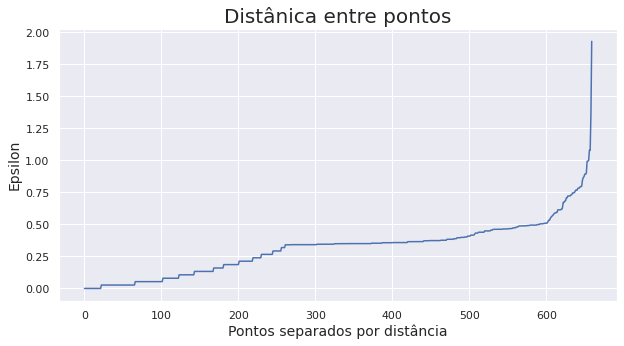

In [21]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Distânica entre pontos',fontsize=20)
plt.xlabel('Pontos separados por distância',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Aqui vemos vamos selecionar 0.75

### 5.2) Clusterização

In [22]:
db = DBSCAN(eps=0.5, min_samples=10).fit(data_scaled)
labels_dbscan = db.labels_
df_dbscan=df
df_dbscan['labels_dbscan']=labels_dbscan.astype('str')

### 5.3) Observação dos clusteres


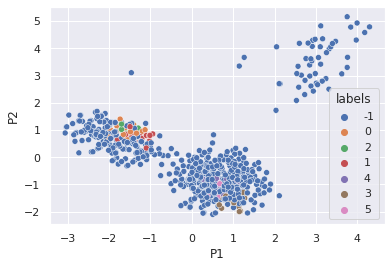

In [23]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf['labels']=df_dbscan['labels_dbscan']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

Aqui vemos que o DBSCAN não separou tão bem os clusteres e os outliers parecem um próprio cluster; Um motivo possível dessa má classificação é as distâncias entre pontos não serem as mesmas para pontos de um mesmo cluster. Podemos diminuir a dimensionalidade dos dados e fornecer como dados de treino as duas dimensões 

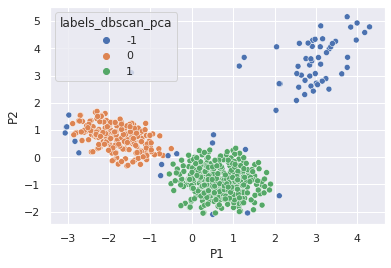

In [25]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
principalDf_dbscan = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])

db_PCA = DBSCAN(eps=0.3, min_samples=10).fit(principalDf_dbscan)
labels_dbscan_pca = db_PCA.labels_
df_dbscan_PCA=df
df_dbscan_PCA['labels_dbscan_pca']=labels_dbscan_pca.astype('str')

principalDf_dbscan['labels_dbscan_pca']=labels_dbscan_pca.astype('str')
sns.scatterplot(data=principalDf_dbscan,x='P1',y='P2',hue='labels_dbscan_pca')

Como os pontos do lado superior esquerdo estão com mais espaçados entre eles, o DBSCAN não os identifica como cluster mas sim como outliers

## 6) Meanshift

### 6.1) Estimando a bandiwtdth

In [27]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [28]:
bandwidth = estimate_bandwidth(data_scaled, quantile=0.1)

In [29]:
bandwidth

1.4062802291365657

### 6.2) Clusterização

In [32]:
ms = MeanShift(bandwidth).fit(data_scaled)
labels_meanshift = ms.labels_
df_meanshift=df
df_meanshift['labels_meanshift']=labels_meanshift.astype('str')

### 6.3) Observando os clusters

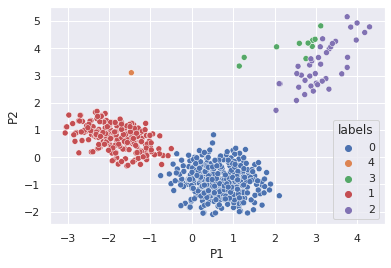

In [33]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf['labels']=df_meanshift['labels_meanshift']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

O ajuste gerou muitos clusters com poucos dados, vamos aumentar o quantile e ver se geramos uma distancia (bandwidth maior e gerar os clusters novamente!

In [36]:
bandwidth = estimate_bandwidth(data_scaled, quantile=0.2)
bandwidth

1.7196647492114912

In [37]:
ms = MeanShift(bandwidth).fit(data_scaled)
labels_meanshift = ms.labels_
df_meanshift=df
df_meanshift['labels_meanshift']=labels_meanshift.astype('str')

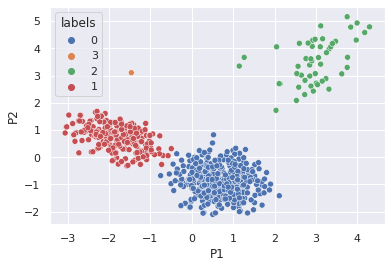

In [38]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf['labels']=df_meanshift['labels_meanshift']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

Com uma distancia maior (bandwidth) vemos clusters mais condizentes! 

## 7) Gaussian Mixture

### 7.1) Numero de clusters utilizando o BIC

In [42]:
from sklearn.mixture import GaussianMixture

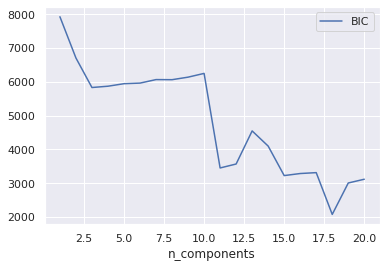

In [44]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data_scaled)
          for n in n_components]

plt.plot(n_components, [m.bic(data_scaled) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components');

### 7.2) Clusterização

In [57]:
gmm = GaussianMixture(3).fit(data_scaled)
labels_gaussian_mixture = gmm.predict(data_scaled)
df_gaussian=df
df_gaussian['labels_gaussian']=labels_gaussian_mixture.astype('str')

### 7.3) Observando os clusters

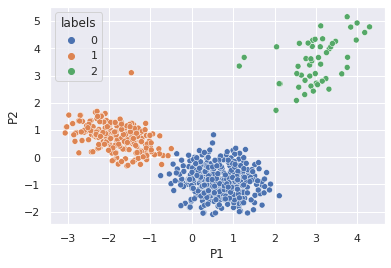

In [58]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf['labels']= df_gaussian['labels_gaussian']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

## 8) Análise dos clusteres



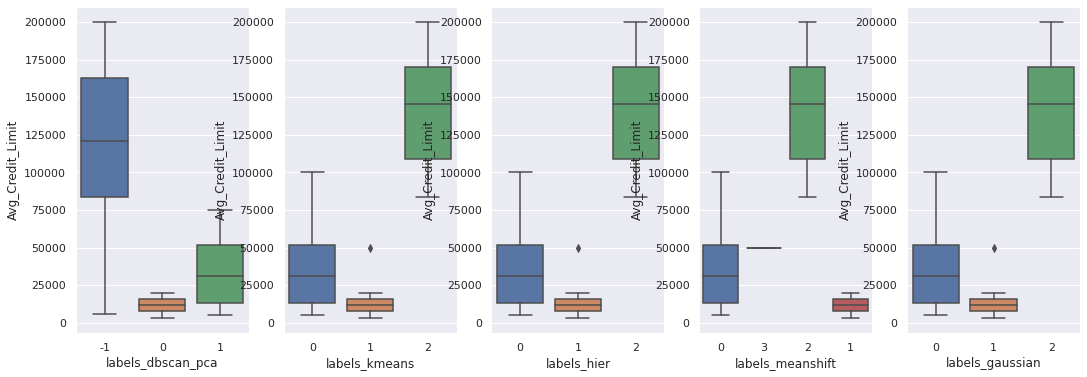

In [60]:
f, axes = plt.subplots(1, 5,figsize=(18, 6))
sns.boxplot(data=df_dbscan_PCA,x='labels_dbscan_pca',y='Avg_Credit_Limit',ax=axes[0])
sns.boxplot(data=df_kmeans,x='labels_kmeans',y='Avg_Credit_Limit',ax=axes[1])
sns.boxplot(data=df_hier,x='labels_hier',y='Avg_Credit_Limit',ax=axes[2])
sns.boxplot(data=df_meanshift,x='labels_meanshift',y='Avg_Credit_Limit',ax=axes[3])
sns.boxplot(data=df_gaussian,x='labels_gaussian',y='Avg_Credit_Limit',ax=axes[4])


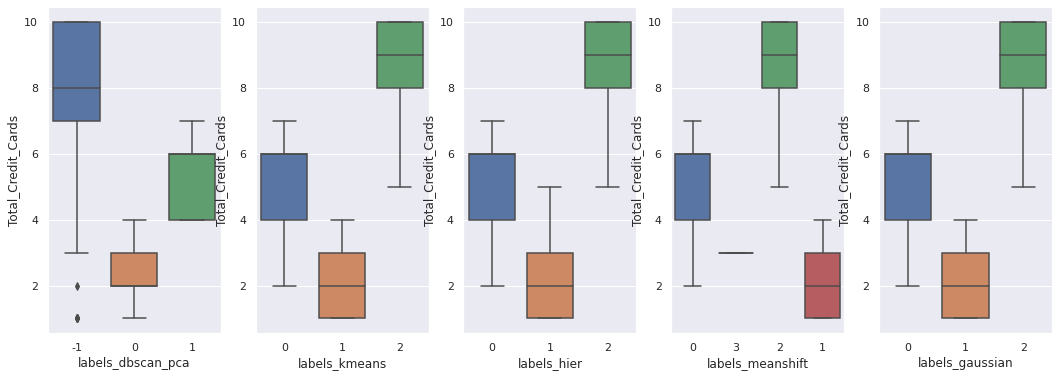

In [62]:
f, axes = plt.subplots(1, 5,figsize=(18, 6))
sns.boxplot(data=df_dbscan_PCA,x='labels_dbscan_pca',y='Total_Credit_Cards',ax=axes[0])
sns.boxplot(data=df_kmeans,x='labels_kmeans',y='Total_Credit_Cards',ax=axes[1])
sns.boxplot(data=df_hier,x='labels_hier',y='Total_Credit_Cards',ax=axes[2])
sns.boxplot(data=df_meanshift,x='labels_meanshift',y='Total_Credit_Cards',ax=axes[3])
sns.boxplot(data=df_gaussian,x='labels_gaussian',y='Total_Credit_Cards',ax=axes[4])

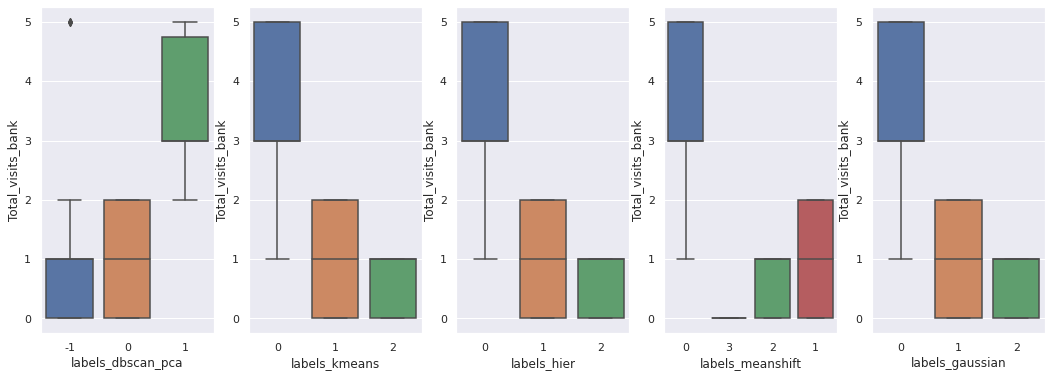

In [64]:
f, axes = plt.subplots(1, 5,figsize=(18, 6))
sns.boxplot(data=df_dbscan_PCA,x='labels_dbscan_pca',y='Total_visits_bank',ax=axes[0])
sns.boxplot(data=df_kmeans,x='labels_kmeans',y='Total_visits_bank',ax=axes[1])
sns.boxplot(data=df_hier,x='labels_hier',y='Total_visits_bank',ax=axes[2])
sns.boxplot(data=df_meanshift,x='labels_meanshift',y='Total_visits_bank',ax=axes[3])
sns.boxplot(data=df_gaussian,x='labels_gaussian',y='Total_visits_bank',ax=axes[4])

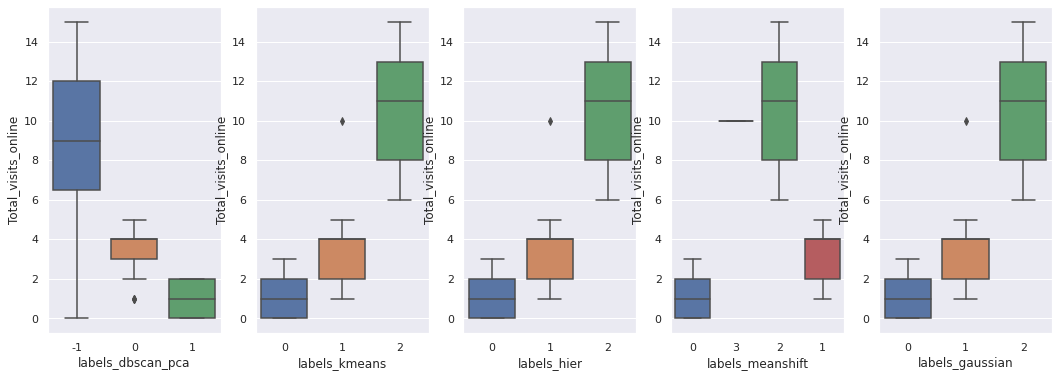

In [68]:
f, axes = plt.subplots(1, 5,figsize=(18, 6))
sns.boxplot(data=df_dbscan_PCA,x='labels_dbscan_pca',y='Total_visits_online',ax=axes[0])
sns.boxplot(data=df_kmeans,x='labels_kmeans',y='Total_visits_online',ax=axes[1])
sns.boxplot(data=df_hier,x='labels_hier',y='Total_visits_online',ax=axes[2])
sns.boxplot(data=df_meanshift,x='labels_meanshift',y='Total_visits_online',ax=axes[3])
sns.boxplot(data=df_gaussian,x='labels_gaussian',y='Total_visits_online',ax=axes[4])

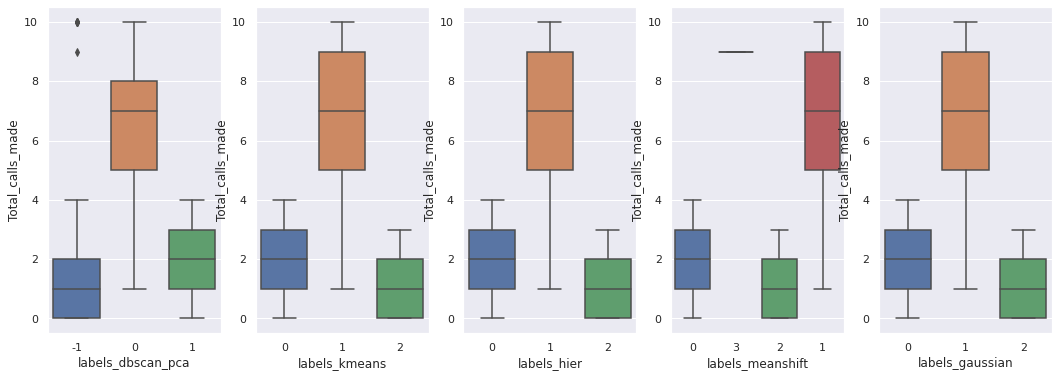

In [69]:
f, axes = plt.subplots(1, 5,figsize=(18, 6))
sns.boxplot(data=df_dbscan_PCA,x='labels_dbscan_pca',y='Total_calls_made',ax=axes[0])
sns.boxplot(data=df_kmeans,x='labels_kmeans',y='Total_calls_made',ax=axes[1])
sns.boxplot(data=df_hier,x='labels_hier',y='Total_calls_made',ax=axes[2])
sns.boxplot(data=df_meanshift,x='labels_meanshift',y='Total_calls_made',ax=axes[3])
sns.boxplot(data=df_gaussian,x='labels_gaussian',y='Total_calls_made',ax=axes[4])

## 9) Conclusão

Antes de definirmos os perfis, é importante dizer que a hierarquia de cluster, Meanshift, Mistura Gaussian e  KMeans tiveram resultados bastante similares e após um análise do gráfico do PCA, viu-se que a clusterização do DBSCAN não foi satisfatória. 

Ao observar os clusteres e a descrição de cada variável, temos algumas variáveis que os boxplots mostram diferenças entre populações de forma que podemos criar 3 perfis.

O cluster 0 é composto por clientes com baixo-médio limite de crédito, médio numero de cartões de crédito, altas visitas ao banco, baixas visitas online e baixas ligações feitas.

O cluster 1 é composto por clientes com baixo limite de crédito, baixo numero de cartões de crédito, baixas visitas ao banco, altas visitas online e ligações feitas.

O cluster 2 é composto por clientes com alto limite de crédito, alto numero de cartões de crédito, baixas visitas ao banco, altas visitas online e baixas ligações feitas.